In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

# TensorFlow and tf.keras|
import tensorflow as tf
from tensorflow import keras

from skimage.util import random_noise

### Import the MNIST dataset

In [2]:
mnist = keras.datasets.mnist   #The original handwritten digit MNIST
#mnist = keras.datasets.fashion_mnist   #A tricky version that uses images of fashion items
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


## Introduction

In this notebook, the following tasks will be completed and discussed:

1. Write a function that adds random noise to MNIST images. For each pixel in the MNIST image the function should add a random noise contribution drawn from a uniform distribution from 0 to ynoise, where ynoise
is a configurable parameter.
2. Train a neural network on the MNIST dataset such that it gets acceptable performance (e.g a test accuracy of 95% or higher)
3. Without retraining your network use this network to make a plot of test accuracy vs  ynoise
  (so run the network repeatedly on the test dataset each time adding a differing noise contribution)
4. Now retrain your neural network using the training sample but with some level of noise added to the sample and then redo task 3.  
5. What is the best level of noise to add to your training dataset to maximise the performance? How would you define the performance?

### Task 1

In the code cell below, a function has been written that adds random noise to MNIST images. For each of the pixels in the image, the function adds a random noise contribution drawn from a uniform distribution from 0 to ynoise, where ynoise is a configurable parameter.

In [3]:
# Create the function to add noice
def add_noise(image, ynoise):

  '''
  This function will add random noise to images
  Inputs: image, ynoise (upper limit to random uniform noise distribution)
  Outputs: image_array_noisy (image array with added noise)
  '''
  # Generate random noise from a uniform distribution
  noise = np.random.uniform(0, ynoise, image.shape)

  # Add the noise to the original image
  noisy_image = image + noise

    # Set cap to 1 for the pixel value
  noisy_image = np.clip(0,1,noisy_image)

  return noisy_image

Processing / Normalising the training and test images: It is necessary to reduce the scale of the image from 255 to 1, which can be done by dividing by 255.0 as shown below.

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

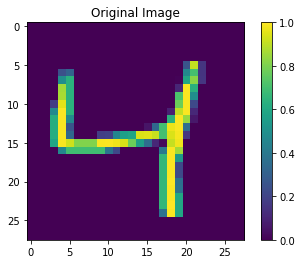

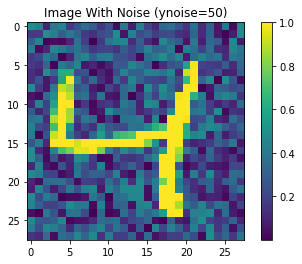

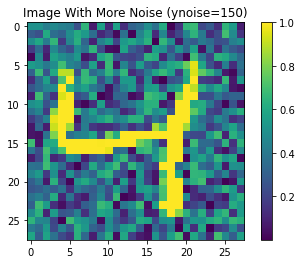

In [5]:
# View original image
plt.figure()
plt.title('Original Image')
plt.imshow(train_images[2])
plt.colorbar()

# View noisy image
plt.figure()
plt.title('Image With Noise (ynoise=50)')
plt.imshow(add_noise(train_images[2], 0.5))
plt.colorbar()

# View noisier image
plt.figure()
plt.title('Image With More Noise (ynoise=150)')
plt.imshow(add_noise(train_images[2], 0.7))
plt.colorbar()

### Task 2

In the code cells below, a neural network will be trained on the MNIST dataset. Parameters have been changed to increase the test accuracy to 95% + 

First the model will be created with three layers, as shown below.

In [6]:
# Create the model with three layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#### Layers
Further layers were added to the initial model. This was because a deeper model is likely to be able to learn more complex representations of the data and recognise more features. More dense layers were added, with the same reLU activation.


#### Epochs
The number of epochs was decreased to 10, since it was found that this decreases the run-time with quite similar accracy to 30 epochs.

#### Optimizer
The Adam optimizer was used, since in this case it is a multi-class classification problem (as there are multiple numbers to be recognised). This optimizer is commonly used for this purpose.


#### Learning Rate
The learning rate has been changed from 1.0 to 0.001 since at higher training noise values, the accuracy gets 'stuck' at a low accuracy. lr = 0.001 avoids this.

The model is then trained on our train and test set (without noise to begin with).

In [7]:
# Train the model
history=model.fit(train_images, train_labels,batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 5s 8ms/step - loss: 0.3314 - accuracy: 0.9089
Epoch 2/10
600/600 [==============================] - 4s 7ms/step - loss: 0.1542 - accuracy: 0.9552
Epoch 3/10
600/600 [==============================] - 4s 6ms/step - loss: 0.1093 - accuracy: 0.9682
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0839 - accuracy: 0.9757
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0668 - accuracy: 0.9805
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0540 - accuracy: 0.9840
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0440 - accuracy: 0.9868
Epoch 8/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0368 - accuracy: 0.9893
Epoch 9/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0310 - accuracy: 0.9913
Epoch 10/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0261 - accuracy: 0.9931

The model is evaluated using the test set (without noise). The accuracy is shown below the code cell.

In [8]:
# Evaluate model accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test Accuracy: {test_acc}')

313/313 - 1s - loss: 0.0737 - accuracy: 0.9773 - 630ms/epoch - 2ms/step
Test Accuracy: 0.9772999882698059


As shown above, the test accuracy is approx 97%, which is relatively high (95%+)

### Task 3
In this section, the same network (without retraining) will be used to make a plot of test accuracy against ynoise. This will help to visualise the relationship between test accuracy and the noise contribution added to the images.

Below, we define some helper functions.

In [9]:
# Create a function to plot test accuracy against noise value
def noise_acc(ynoise_values):

  '''
  Function that determines the test accuracy for a given array of noise contributions
  Inputs: ynoise_values (array of noise)
  Outputs: test_accuracies (array of accuracies)
  '''

  # List to store the test accuracies for different ynoise values
  test_accuracies = []

  # Iterate over different ynoise values
  for ynoise in ynoise_values:

      # Add noise to the test images
      x_test_noisy = add_noise(test_images, ynoise)

      # Evaluate the model on the noisy test data
      test_loss, test_acc = model.evaluate(x_test_noisy, test_labels, verbose=0)

      # Append the test accuracy to the list
      test_accuracies.append(test_acc)

  return test_accuracies

The next function that will be created is to plot the test accuracies against the different test noise values, since this will be used multiple times.

In [10]:
def plot_acc(ynoise_values, test_accuracies):
  '''
  Function to plot the test accuracy against noise contributions
  Inputs: ynoise_values (noise contributions array), test_accuracies (test accuracies array)
  Outputs: None
  '''
  # Plot
  plt.plot(ynoise_values, test_accuracies, label='Test Accuracy')
  plt.title('Test Accuracies vs Noise Contribution', fontsize=20)
  plt.xlabel('Noise contribution', fontsize=15)
  plt.ylabel('Test accuracy', fontsize=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.legend(fontsize=12)
  plt.show()

  # No other output needed
  return None


Using the defined function, an array of test accuracies for each of the noise contributions was generated below.

In [11]:
# 50 noise values from 0 to 1
ynoise_values = np.linspace(0,2,20)

# Generate the test accuracies for zero noise in training data
test_accuracies_none = np.array(noise_acc(ynoise_values))

The test accuracies were plotted against the respective noise contributions, as shown in the figure below.

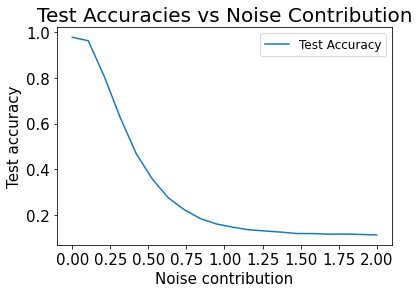

In [12]:
# Plot the test accuracy vs ynoise
plot_acc(ynoise_values, test_accuracies_none)

It can be observed that the test accuracy begins to drop off faster as the noise contribution increases beyond approximately 0.15.

This suggests that more noisy test images become much harder (almost exponentially) for the model to predict. This makes sense given the network was trained on data with no/very little noise.

It can be investigated if accuracy can be improved by training the model on noisy images to begin with. 

### Task 4

The model was trained on images with varying levels of noise (from zero to one). These were then all plotted together to visualise for comparison.

In [ ]:
def model_test(ynoise):

  # Generate training images with a noise contribution of 0.1
  noisy_train_images = add_noise(train_images, ynoise=0.25)


        # Create the model with three layers
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(10)
  ])

  # Compile
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

  # Fit the model to the noisy images (ynoise = 0.1)
  history=model.fit(noisy_train_images, train_labels,batch_size=100, epochs=10, verbose=0)
  print('Model Trained')

  # Generate the test accuracies
  test_accuracies = np.array(noise_acc(ynoise_values))

  return test_accuracies

test_accuracies = model_test(ynoise=0)

# Plot the test accuracy vs ynoise
plot_acc(ynoise_values, test_accuracies)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Trained


In [ ]:
# Generate the test accuracies
test_accuracies_01 = model_test(ynoise=0.1)

# Plot the test accuracy vs ynoise
plot_acc(ynoise_values, test_accuracies_01)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Trained


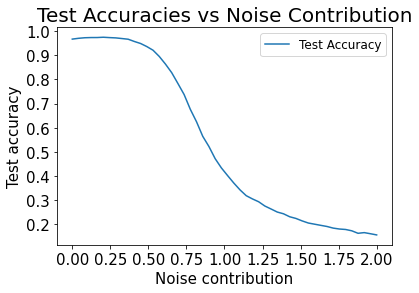

In [30]:
# Generate training images with a noise contribution of 0.25
noisy_train_images_25 = add_noise(train_images, ynoise=0.25)




# Fit the model to the noisy images (ynoise = 25)
history=model.fit(noisy_train_images_25, train_labels,batch_size=100, epochs=10, verbose=0)
print('Model Trained')

# Generate the test accuracies
test_accuracies_25 = np.array(noise_acc(ynoise_values))

# Plot the test accuracy vs ynoise
plot_acc(ynoise_values, test_accuracies_25)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Trained


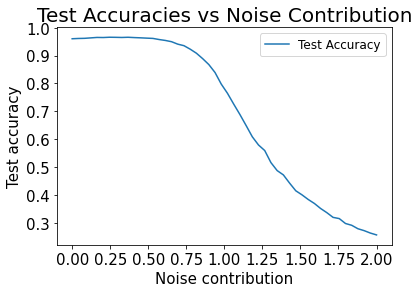

In [31]:
# Generate training images with a noise contribution of 0.50
noisy_train_images_50 = add_noise(train_images, ynoise=0.50)


      # Create the model with three layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

# Fit the model to the noisy images (ynoise = 0.50)
history=model.fit(noisy_train_images_50, train_labels,batch_size=100, epochs=10, verbose=0)
print('Model Trained')

# Generate the test accuracies
test_accuracies_50 = np.array(noise_acc(ynoise_values))

# Plot the test accuracy vs ynoise
plot_acc(ynoise_values, test_accuracies_50)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Trained


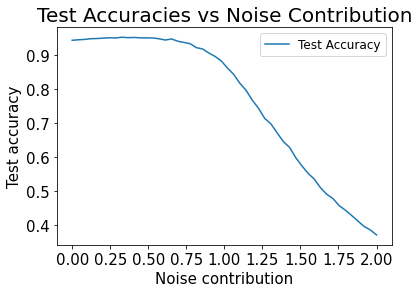

In [32]:
# Generate training images with a noise contribution of 0.75
noisy_train_images_75 = add_noise(train_images, ynoise=0.75)


      # Create the model with three layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

# Fit the model to the noisy images (ynoise = 0.50)
history=model.fit(noisy_train_images_75, train_labels,batch_size=100, epochs=10, verbose=0)
print('Model Trained')

# Generate the test accuracies
test_accuracies_75 = np.array(noise_acc(ynoise_values))

# Plot the test accuracy vs ynoise
plot_acc(ynoise_values, test_accuracies_75)

In [34]:
# Generate training images with a noise contribution of 0.75
noisy_train_images_75 = add_noise(train_images, ynoise=0.75)


      # Create the model with three layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

# Compile
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])

# Fit the model to the noisy images (ynoise = 0.50)
history=model.fit(noisy_train_images_75, train_labels,batch_size=100, epochs=10, verbose=0)
print('Model Trained')

# Generate the test accuracies
test_accuracies_100 = np.array(noise_acc(ynoise_values))

# Plot the test accuracy vs ynoise
plot_acc(ynoise_values, test_accuracies_100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Trained


KeyboardInterrupt: ignored

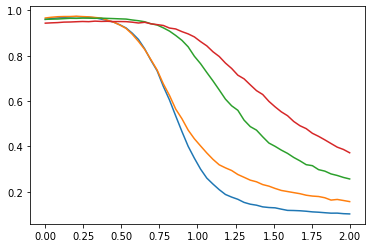

In [35]:
plt.figure()
plt.title('Test accuracy vs test noise values, for different training noise contributions')
plt.xlabel('Test Noise Contribution')
plt.ylabel('Test accuracy')
plt.plot(ynoise_values, test_accuracies_01, label='0.1 Noise')
plt.plot(ynoise_values, test_accuracies_25, label='0.25 Noise')
plt.plot(ynoise_values, test_accuracies_50, label='0.50 Noise')
plt.plot(ynoise_values, test_accuracies_75, label='0.75 Noise')
plt.legend()


##### Observations
Above, we can see that as you increase the training noise from 0 to 1, the test accuracy improves significantly over larger test noise contributions. The largest improvement is when increasing the training noise from 0 to 0.25, i.e. at a test noise of 1, we observe approximately 0.4 increase in test accuracy.

### Task 5

There are two questions to be answered in this task: 

1. What is the best level of noise to add to your training dataset to maximise the performance? 

2. How would you define the performance?

First, a plot was made, using smaller intervals of training noise contributions.

In [ ]:
# Initial values
training_noise_values = np.linspace(0,2,5)

# Generate accuracies for the different models
test_accuracies_all = train_model_with_noise(train_images, train_labels, ynoise_values, training_noise_values)

In [ ]:
# Plotting
plot_test_accuracies(test_accuracies_all, training_noise_values, ynoise_values)

###### Best Training Noise
The best training noise was found to be somewhere around approximately ynoise = 0.50.

This was because it held the highest test accuracy for the majority of test noises (was the most consistently high accuracy), as shown in the previous plot comparing the test accuracy for each.

###### Defining Performance
One way to define the performance is by observing which training noise contribution has the highest test accuracy across the most test noise contributions. We can deduce from the above plot that the training noise of 0.75 or 1.0 fits this criteria the best.

###### Overfitting
One factor to consider is overfitting. Since we add only gaussian noise to our training sets, there is a possibility that the model overfits to identify images with gaussian noise and could experience lower accuracy on images with different noise distributions.